# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [0]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [3]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Youseff, Mr. Gerious",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [4]:
# TODO

titanic.isna().sum()
#titanic.isnull()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [5]:
# TODO
#the missing values of column age with the mean of that column.
print(titanic['Age'].mean())
titanic['Age'].fillna((titanic['Age'].mean()), inplace=True)
titanic['Age'].head(50)

29.69911764705882


0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
18    31.000000
19    29.699118
20    35.000000
21    34.000000
22    15.000000
23    28.000000
24     8.000000
25    38.000000
26    29.699118
27    19.000000
28    29.699118
29    29.699118
30    40.000000
31    29.699118
32    29.699118
33    66.000000
34    28.000000
35    42.000000
36    29.699118
37    21.000000
38    18.000000
39    14.000000
40    40.000000
41    27.000000
42    29.699118
43     3.000000
44    19.000000
45    29.699118
46    29.699118
47    29.699118
48    29.699118
49    18.000000
Name: Age, dtype: float64

In [6]:
#the missing values of column Cabin with a constant value 'other'.
titanic['Cabin'].fillna("other", inplace = True) 
titanic['Cabin'].head(50)

0           other
1             C85
2           other
3            C123
4           other
5           other
6             E46
7           other
8           other
9           other
10             G6
11           C103
12          other
13          other
14          other
15          other
16          other
17          other
18          other
19          other
20          other
21            D56
22          other
23             A6
24          other
25          other
26          other
27    C23 C25 C27
28          other
29          other
30          other
31            B78
32          other
33          other
34          other
35          other
36          other
37          other
38          other
39          other
40          other
41          other
42          other
43          other
44          other
45          other
46          other
47          other
48          other
49          other
Name: Cabin, dtype: object

### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [7]:
# TODO
titanic.sort_values(by='Fare', ascending=False).head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,other,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.000000,0,0,PC 17755,512.3292,B101,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.000000,0,1,PC 17755,512.3292,B51 B53 B55,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,C23 C25 C27,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,C23 C25 C27,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.000000,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,B58 B60,C


In [8]:
titanic.sort_values(by='Fare', ascending=False).iloc[15]

PassengerId                   528
Survived                        0
Pclass                          1
Name           Farthing, Mr. John
Sex                          male
Age                       29.6991
SibSp                           0
Parch                           0
Ticket                   PC 17483
Fare                      221.779
Cabin                         C95
Embarked                        S
Name: 527, dtype: object

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [9]:
# TODO
df4 = titanic[titanic.Sex == 'female'].sort_values(by='Fare', ascending=False)
print(df4.head(8))
df5 = titanic[titanic.Sex == 'female'].sort_values(by='Fare', ascending=False).iloc[5]
print(df5.head())

     PassengerId  Survived  Pclass  ...      Fare            Cabin  Embarked
258          259         1       1  ...  512.3292            other         C
341          342         1       1  ...  263.0000      C23 C25 C27         S
88            89         1       1  ...  263.0000      C23 C25 C27         S
742          743         1       1  ...  262.3750  B57 B59 B63 B66         C
311          312         1       1  ...  262.3750  B57 B59 B63 B66         C
299          300         1       1  ...  247.5208          B58 B60         C
716          717         1       1  ...  227.5250              C45         C
380          381         1       1  ...  227.5250            other         C

[8 rows x 12 columns]
PassengerId                                                300
Survived                                                     1
Pclass                                                       1
Name           Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Sex                             

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [10]:
# TODO
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [11]:
titanic[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [12]:
pd.pivot_table(titanic, values='Survived', index=['Sex'])

,Survived
Sex,
female,0.742038
male,0.188908


In [13]:
pd.pivot_table(titanic, values='Survived', index=['Pclass'])

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


The women survived 74% of the time, while the men only survived 18.9% of the time.  The classes also contributed to the survival rate.  First class had a 63% chance of survival, second class had a 47% chance, and third class had a 24% chance.

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

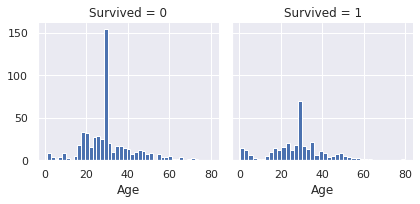

In [14]:
# TODO
viz = sns.FacetGrid(titanic, col='Survived')
viz.map(plt.hist, 'Age', bins=40)

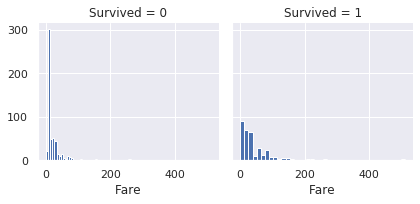

In [15]:
viz = sns.FacetGrid(titanic, col='Survived')
viz.map(plt.hist, 'Fare', bins=40)

In [16]:
titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


In [17]:
titanic[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Age,Survived
78,61.00,0.0
30,23.50,0.0
37,28.50,0.0
26,20.50,0.0
41,30.50,0.0
...,...,...
3,0.83,1.0
2,0.75,1.0
1,0.67,1.0
69,53.00,1.0


In [18]:
titanic[['Fare', 'Survived']].groupby(['Fare'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Fare,Survived
56,8.7125,0.0
160,32.3208,0.0
76,11.5000,0.0
163,33.5000,0.0
164,34.0208,0.0
...,...,...
161,32.5000,1.0
77,12.0000,1.0
79,12.2875,1.0
44,8.1125,1.0


In [19]:
titanic['FareBins'] = pd.qcut(titanic['Fare'], 5)
titanic[['FareBins', 'Survived']].groupby(['FareBins'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [20]:
titanic['AgeBins'] = pd.qcut(titanic['Age'], 5)
titanic[['AgeBins', 'Survived']].groupby(['AgeBins'], as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,AgeBins,Survived
2,"(28.0, 29.699]",0.301508
1,"(20.0, 28.0]",0.360656
4,"(38.0, 80.0]",0.372881
3,"(29.699, 38.0]",0.444444
0,"(0.419, 20.0]",0.458101


I think Fare is a more important factor in one's change of survival. Fare and survival have a correlation of 0.257307 while age has a correlation of -0.069809

Other Observations:

* Infants over the age of 4 had high survival rate.
* Large number of 15-25 year-olds did not survive.
* The majority of passengers are between ages 15-35.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

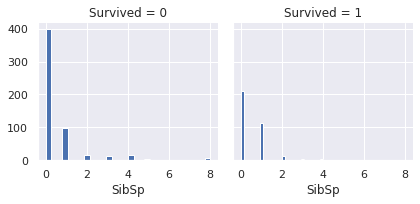

In [21]:
# TODO
pd.pivot_table(titanic, values='Survived', index=['SibSp'])
vizSibSp = sns.FacetGrid(titanic, col='Survived')
vizSibSp.map(plt.hist, 'SibSp', bins=30)

In [22]:
pd.pivot_table(titanic, values='Survived', index=['SibSp'])

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [23]:
pd.pivot_table(titanic, values='Survived', index=['Parch'])

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


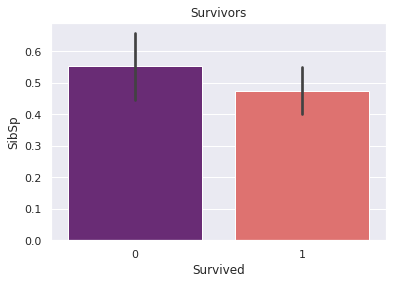

In [24]:
# create plot
sns.barplot(x = 'Survived',y = 'SibSp', data = titanic, palette = 'magma')
plt.title('Survivors')
plt.show()

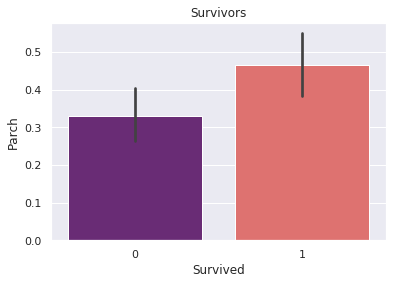

In [25]:
# create plot
sns.barplot(x = 'Survived',y = 'Parch', data = titanic, palette = 'magma')
plt.title('Survivors')
plt.show()

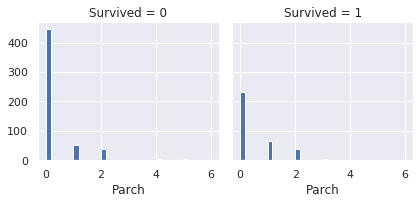

In [26]:
pd.pivot_table(titanic, values='Survived', index=['Parch'])
vizParch = sns.FacetGrid(titanic, col='Survived')
vizParch.map(plt.hist, 'Parch', bins=30)

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


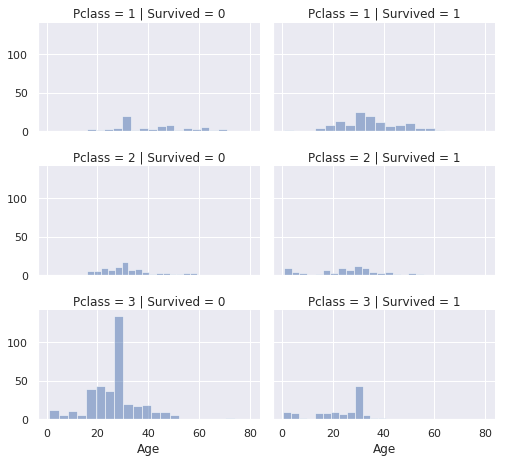

In [27]:
# TODO

grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


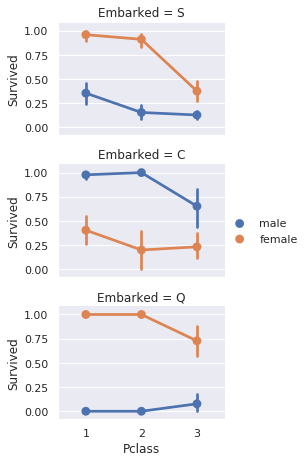

In [28]:
grid = sns.FacetGrid(titanic, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


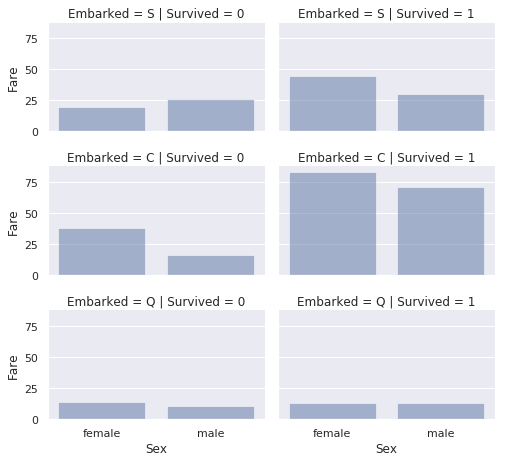

In [29]:
grid = sns.FacetGrid(titanic, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

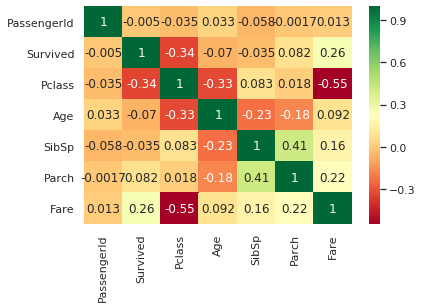

In [30]:
def titanic_corr(data):
    correlation = titanic.corr()
    sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")
    
titanic_corr(titanic)

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

In [31]:
total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Embarked,2,0.2
AgeBins,0,0.0
FareBins,0,0.0
Cabin,0,0.0
Fare,0,0.0


Text(0, 0.5, 'Number of passengers')

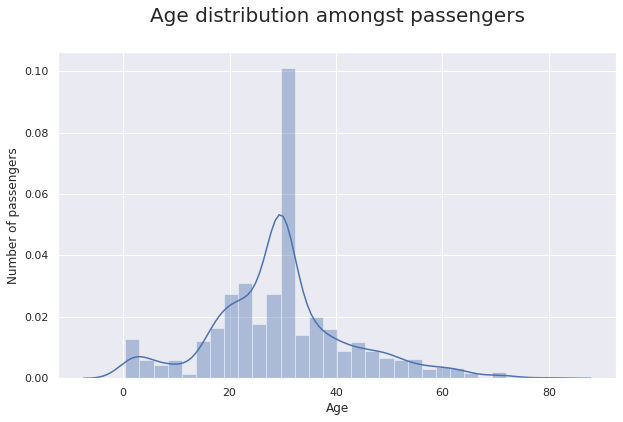

In [32]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(titanic[titanic['Age'].notnull()].Age, hist = True)
plt.title("Age distribution amongst passengers", fontdict = {'fontsize':20}, pad = 30.0)
plt.xlabel("Age")
plt.ylabel("Number of passengers")


### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

# LOGISTIC REGRESSION


In [0]:
%matplotlib inline
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", color_codes = True)
np.random.seed(sum(map(ord, "palettes")))

from sklearn.metrics import roc_auc_score

#Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import cross_val_score,train_test_split

In [0]:
# load data - train vs test
train = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')

In [0]:
test_PassengerId = test["PassengerId"]  # save the id for submiting the final results

train.drop(['PassengerId', "Ticket", 'Cabin'], axis = 1, inplace = True)
test.drop(['PassengerId', "Ticket", 'Cabin'], axis=1, inplace = True)
train_test_data = [train, test] 

The cabin has more missing data than available data, the PassengerId and Name wouldn't have relationship with survival.

As we stated above, there is no importance of the Name and PassengerId for the data analysis. however, we need Name to generate the Title feature in the feature engineering. So, we will not drop the Name feature for now. 

In [0]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'male': 1, 'female': 0}).astype(int)

In [37]:
train[['Sex', 'Survived']].groupby(['Sex'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Sex,Survived
1,1,0.188908
0,0,0.742038


In [38]:
train[['Pclass', 'Survived']].groupby(['Pclass'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,Pclass,Survived
2,3,0.242363
1,2,0.472826
0,1,0.629630


In [39]:
age_fill = np.zeros((2,3)) # 2 for sex and 3 for Pclass
print(age_fill)

[[0. 0. 0.]
 [0. 0. 0.]]


In [40]:
age_fill = np.zeros((2,3)) 
for dataset in train_test_data:
    for s in range(0, 2):
        for p in range(0, 3):
            age_fill_df = dataset[(dataset['Sex'] == s) &\
                               (dataset['Pclass'] == p + 1)]['Age'].dropna()
            age_to_fill = age_fill_df.median()

            # Convert random age float to nearest .5 age
            age_fill[s,p] = int( age_to_fill/0.5 + 0.5 ) * 0.5
            
    for s in range(0, 2):
        for p in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == s) & (dataset.Pclass == p + 1),\
                    'Age'] = age_fill[s,p]

    dataset['Age'] = dataset['Age'].astype(int)

train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S


In [0]:
train['AgeBins'] = pd.cut(train['Age'], 8)

In [42]:
train[['AgeBins', 'Survived']].groupby(['AgeBins'], 
                                       as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,AgeBins,Survived
6,"(60.0, 70.0]",0.222222
7,"(70.0, 80.0]",0.250000
2,"(20.0, 30.0]",0.322751
1,"(10.0, 20.0]",0.379310
4,"(40.0, 50.0]",0.392857
5,"(50.0, 60.0]",0.404762
3,"(30.0, 40.0]",0.448649
0,"(-0.08, 10.0]",0.593750


In [0]:
for dataset in train_test_data:    
    dataset.loc[dataset['Age'] <= 10, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 10) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 60) & (dataset['Age'] <= 70), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 70, 'Age'] = 7

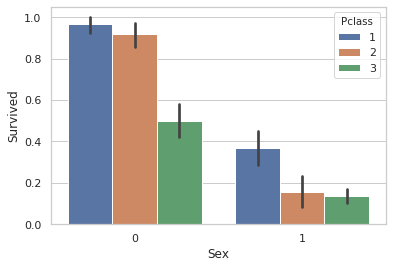

In [44]:
fig = sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)

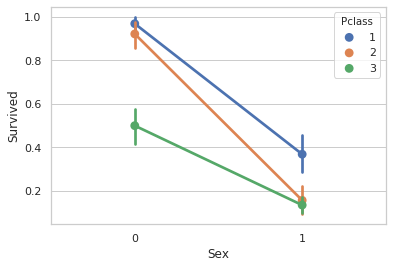

In [45]:
fig = sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=train);

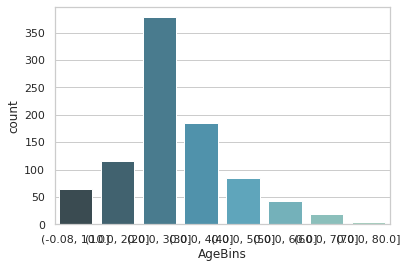

In [46]:
sns.countplot(x="AgeBins", data = train, palette = "GnBu_d");

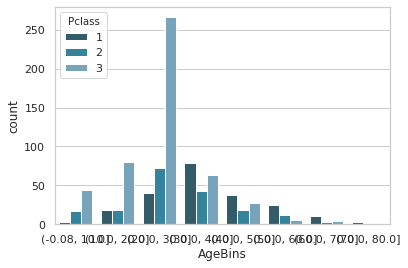

In [47]:
sns.countplot( x ="AgeBins", hue="Pclass", data = train, palette="PuBuGn_d");

In [48]:
train = train.drop(['AgeBins'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S


In [49]:
for dataset in train_test_data:
    dataset["FamilySize"] = dataset['SibSp'] + dataset['Parch']
train, test = train_test_data[0], train_test_data[1]
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,0,0,8.0500,S,0


In [50]:
train[['FamilySize', 'Survived']].groupby(['FamilySize'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


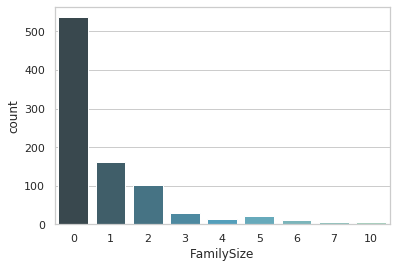

In [51]:
sns.countplot(x="FamilySize", data = train, palette = "GnBu_d");


In [52]:
train = train.drop(['Parch', 'SibSp'], axis = 1)
test = test.drop(['Parch', 'SibSp'], axis = 1)
train_test_data = [train, test]
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,S,0


In [53]:
Embarking_freq = train.Embarked.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(Embarking_freq)
train, test = train_test_data[0], train_test_data[1]
train.head()   

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,S,0


In [54]:
train[['Embarked', 'Survived']].groupby(['Embarked'], 
                                       as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [55]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,7.2500,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,71.2833,1,1
2,1,3,"Heikkinen, Miss. Laina",0,2,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,53.1000,0,1
4,0,3,"Allen, Mr. William Henry",1,3,8.0500,0,0


In [0]:
Fare_freq = test.Fare.dropna().mode()[0]
for dataset in train_test_data:
    dataset['Fare'] = dataset['Fare'].fillna(Fare_freq)

In [57]:
train['FareBins'] = pd.qcut(train['Fare'], 5)
train[['FareBins', 'Survived']].groupby(['FareBins'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = True)

,FareBins,Survived
1,"(7.854, 10.5]",0.201087
0,"(-0.001, 7.854]",0.217877
2,"(10.5, 21.679]",0.424419
3,"(21.679, 39.688]",0.444444
4,"(39.688, 512.329]",0.642045


In [0]:
for dataset in train_test_data:    
    dataset.loc[dataset['Fare']  <=7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.84)   & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5)   & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 5512.329), 'Fare'] = 4

In [59]:
train, test = train_test_data[0], train_test_data[1]
train = train.drop(['FareBins'], axis = 1)
train.head(6)

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,1,1
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,0,1
4,0,3,"Allen, Mr. William Henry",1,3,1.0,0,0
5,0,3,"Moran, Mr. James",1,2,1.0,2,0


In [0]:
def extract_title(df):
    # the Name feature includes last name, title, and first name. After splitting 
    # the title is in the second column or at index 1
    df["Title"] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()) 
    return df
train = extract_title(train)
test = extract_title(test)

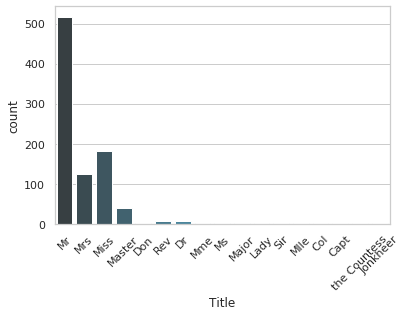

In [61]:
fig = sns.countplot(x = 'Title', data = train, palette = "GnBu_d")
fig = plt.setp(fig.get_xticklabels(), rotation = 45)

In [0]:
train_test_data = [train, test]
for dset in train_test_data:
    dset["Title"] = dset["Title"].replace(["Melkebeke", "Countess", "Capt", "the Countess", "Col", "Don",
                                         "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"] , "Lamped")
    dset["Title"] = dset["Title"].replace(["Lady", "Mlle", "Ms", "Mme"] , "Miss")

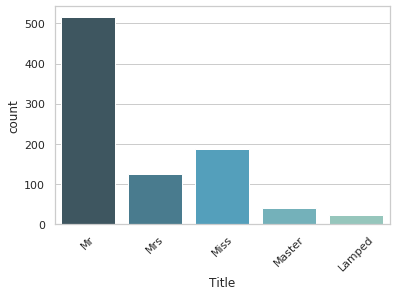

In [63]:
fig2 = sns.countplot(x = 'Title', data = train, palette = "GnBu_d")
fig2 = plt.setp(fig2.get_xticklabels(), rotation = 45)

In [64]:
train[['Title', 'Survived']].groupby(['Title'], 
                                        as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
4,Mrs,0.792000
2,Miss,0.705882
1,Master,0.575000
0,Lamped,0.318182
3,Mr,0.156673


In [65]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map({'Mr': 1, 'Miss': 2, 'Mrs': 3, 
                                             'Master': 4, 'Lamped': 5}).astype(int)
train.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",1,2,0.0,0,1,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3,4.0,1,1,3
2,1,3,"Heikkinen, Miss. Laina",0,2,1.0,0,0,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3,4.0,0,1,3
4,0,3,"Allen, Mr. William Henry",1,3,1.0,0,0,1


In [66]:
train.drop(['Name'], axis = 1, inplace = True)
test.drop(['Name'], axis=1, inplace = True)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Title
0,0,3,1,2,0.0,0,1,1
1,1,1,0,3,4.0,1,1,3
2,1,3,0,2,1.0,0,0,2
3,1,1,0,3,4.0,0,1,3
4,0,3,1,3,1.0,0,0,1


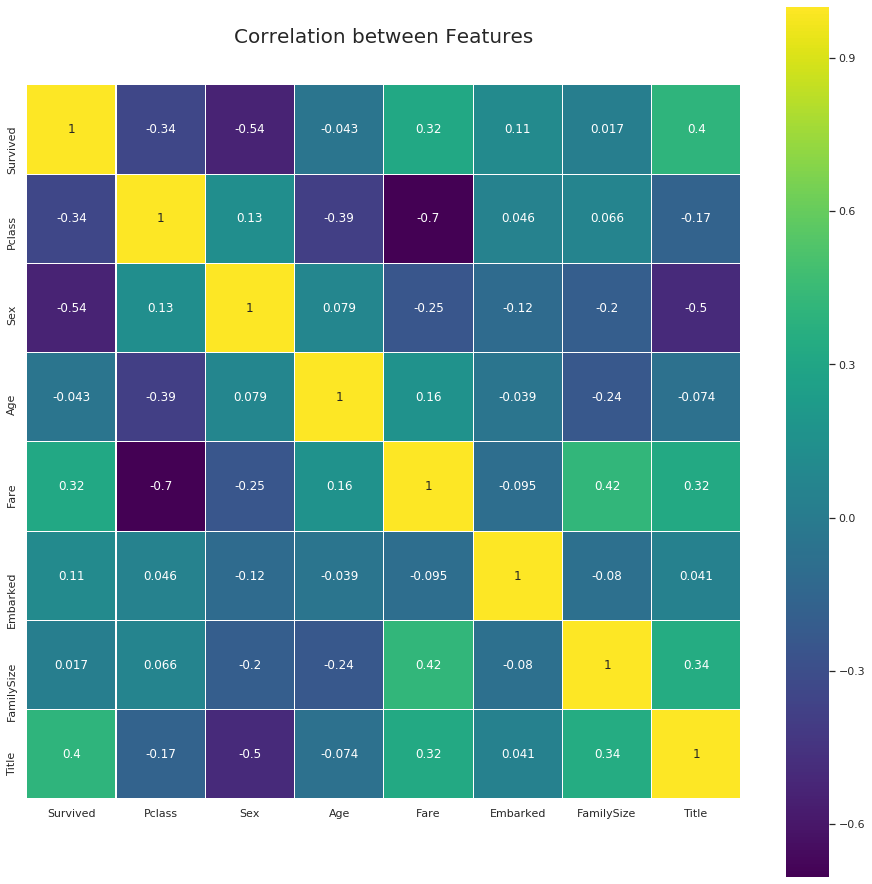

In [67]:
colormap = plt.cm.viridis
plt.figure(figsize=(16,16))
plt.title('Correlation between Features', y=1.05, size = 20)
sns.heatmap(train.corr(),
            linewidths=0.1, 
            vmax=1.0, 
            square=True, 
            cmap=colormap, 
            linecolor='white', 
            annot=True)

In [68]:
y_train = train["Survived"]
X_train = train.drop(["Survived"], axis = 1 )

X_test = test
X_train.shape, y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [69]:
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)
y_pred_lr = LR.predict(X_test)
LR_score = LR.score(X_train, y_train)
print("LR Accuracy  score = {:.2f}".format(LR_score*100))

LR Accuracy  score = 81.37
